<h1 style="color:blue;"> WHAT IS TRANSFORMER IN SKLEARN</h1>

**Transformers are used to preprocess and make the data suitable for our machine learning model. They are used to handle missing values, reduce dimensions, standardize the features, normalize fetures etc. The transformed features are then given as input to our model. Note that basic models like Linear Regression, Logistic Regression do need some transformation applied on the features, otherwise you wil get a heart wrenching bad accuracy. So do transform your features :)**

**Common transformers include standardscaler, imputer, PCA, MinMaxScaler and many others.**

**Note that when applying any sort of transformation, do split the training and testing data first and then apply the transformations separately on the train and test data.**

<h1 style="color:blue;"> DIFFERENCE BETWEEN fit(), transform() and fit_transform() </h1>

**When we do some transformation, we use fit() to sort of initialize the formula (be it normalization, standardization ,PCA etc) and then we use transform() which applies the particular formula to our data**

**In the case of fit_transform(), we essentially include both fit() and transform(), so it is a combination of both the methods.**

<h3 style="color:crimson"> So essentially fit() and then transform, or fit_transform() are the same thing. The latter is just of combination of the former two methods.</h3>

**Now, we can do either fit() and then transform(), or fit_transform() on our training data and then feed the transformed features to our model.**

**We can then use model.fit() to fit our model on the training data and model.predict() on the test data.**

<h3 style="color:red;">Always remember to do the transformation you applied on the training data, onto the test data as well. Note that we do fit() and then transform(), or fit_trasnform() only on the training data. However, on the test data, we only do transform(), we do not do fit() or fit_transform().</h1>

<hr>

## CATEGORICAL FEATURE TRANSFORMATION

**There are two types of categorical data; nominal and ordinal categorical feature.**
<BR>
    
    1)Nominal feature is one in which there is no relationship between the value of that feature. Example include names of cities, subject names, etc.

    2)Ordinal feature is one in which there is an order between the values of that feature. Examples include weather, it can be low, modrrn, high, severe. So there is an order between the values.

<h2 style="color:red;"> ORDINAL ENCODING (For ordinal data) VS LABEL ENCODING (For ordinal data) VS ONE HOT ENCODING (For nominal data)</h2>

**OrdinalEncoder is used for converting ordinal FEATURES, while LabelEncoder is for converting ordinal TARGET variable only.**

***That's why OrdinalEncoder can fit data that has the shape of (n_samples, n_features) while LabelEncoder can only fit   data that has the shape of (n_samples,) (though in the past one used LabelEncoder within the loop to handle what has been becoming the job of OrdinalEncoder now)***

***When we have an ordianl column (target or feature), we just specify which value should have higher precedence and sklearn's ordinal encoder will do everything by itself.***

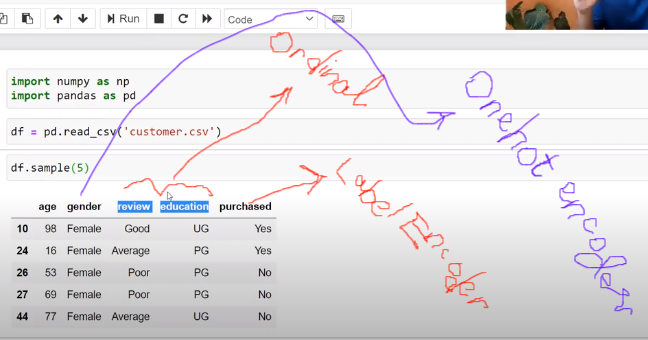

## ORDINAL ENCODER

In [3]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
oe = OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['UG', 'PG']])

In [ ]:
oe.fit(X_train)
X_train_transformed = oe.transform(X_train)
X_test_transformed = oe.transform(X_test)   #not fitting on test data, remember

In [ ]:
oe.categories_    

## LABEL ENCODER

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [ ]:
le.fit()
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)


In [ ]:
le.classes_

## ONE HOT ENCODER

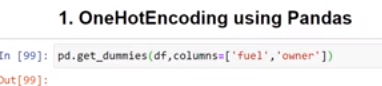

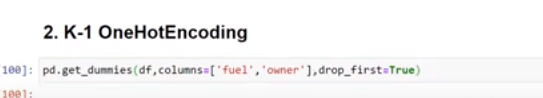

## 3.OneHotEncoding using SKLEARN

In [15]:
from sklearn.preprocessing import OneHotEncoder

#we should drop first column of encoded features to avoid collinearity

In [14]:
ohe = OneHotEncoder(drop='first',dtype=np.int32)

NameError: name 'np' is not defined

In [ ]:
X_train_new = ohe.fit_transform(X_train[['fuel', 'brand']]).toarray()
X_test_new = ohe.transform(X_test[['fuel', 'brand']]).toarray()

In [ ]:
np.hstack((X_train[['numeric_col1', 'numeric_col2']].values),X_train_new)

#We are adding the numeric columns with the transformed (encoded) categorical columns

### When alot of categories in categorical columns

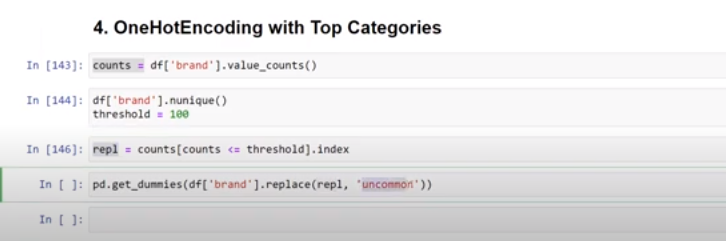


<hr>

# AT THE END..........

<h1 style="color:red;">COLUMN TRANSFORMER</h1>

**When the features are alot in number and each require different types of transformations then we use column transformer for efficieny.**

In [16]:
from sklearn.compose import ColumnTransformer

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

## What we are doing is, for df['fever'], we make a simple imputer transformer.
## Similarly, for df['cough']. we are doing ordinal encoding and specifying the order of the categories; from mild to strong.
## And for df[['genrer', 'city']], we are doing one hot encoding and droping the first column to avoid collinearity.

In [ ]:
transformer.fit_transform(X_train).shape


In [ ]:
transformer.transform(X_train).shape


**Just go to this link, it has everything that the whole notebook has explained.**

https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day28-column-transformer/day28.ipynb